# Portfolio Construction using Bayes and MVO


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import statsmodels.api as sm

C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('darkgrid')

# 1. Introduction

## 1.1 Modern Portfolio Theory

Modern Portfolio Theory (MPT) is an investment theory developed by Harry Markowitz and published under the title “Portfolio Selection” in the Journal of Finance in 1952. Higher risk is associated with greater probability of higher return and lower risk with a greater probability of smaller return. MPT assumes that investors are risk-averse, meaning that given two portfolios that offer the same expected return, investors will prefer the less risky one. Thus, an investor will take on increased risk only if compensated by higher expected returns.

Another factor comes in to play in MPT is “diversification”. Modern portfolio theory says that it is not enough to look at the expected risk and return of one particular stock. By investing in more than one stock, an investor can reap the benefits of diversification — chief among them, a reduction in the riskiness of the portfolio.

What you need to understand is that “risk of a portfolio is not equal to average/weighted-average of individual stocks in the portfolio”. In terms of return, yes it is the average/weighted average of individual stock’s returns, but that’s not the case for risk. The risk is about how volatile the asset is, if you have more than one stock in your portfolio, then you have to take count of how these stocks movement correlates with each other. The beauty of diversification is that you can even get lower risk than a stock with the lowest risk in your portfolio, by optimising the allocation.

### 1.1.1 Mean-Variance Model

#### Portfolio standard deviation
The first is the calculation for portfolio’s volatility in "portfolio_annualised_performance” function. If you look up “portfolio standard deviation formula”, you will come across formulas as below.

$$ \sigma_{portfolio} = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2Cov_{1,2}}$$

With the above matrix calculation, we get the part inside the square root in the original formula. Now, all we need to do is put them inside the square root. Same as the annualised return, I took into account of 252 trading days (in this case, the square root of 252) to calculate the annualised standard deviation of a portfolio.

#### Portfolio Optimization

$$ w_{opt} = \max_{w} \frac{1}{N}\left( \sum_{i=0}^N \mu_i^T w - \frac{\lambda}{2}w^T\Sigma_i w \right)$$

where $\mu_i$ and $\Sigma_i$ are the $i$th posterior estimate of the mean returns and the covariance matrix. This is another example of loss function optimization.

#### Sharpe ratio
The second thing I would like to point out is the Sharpe ratio. In order to understand the Sharpe ratio, it is essential to understand the broader concept of risk-adjusted return. Risk-adjusted return refines an investment’s return by measuring how much risk is involved in producing that return, which is generally expressed as a number or rating. There could be a number of different methods of expressing risk-adjusted return, and the Sharpe ratio is one of them.

The ratio describes how much excess return you are receiving for the extra volatility that you endure for holding a riskier asset. The Sharpe ratio can be expressed in below formula.

$$Sharpe \,Ratio = \frac{R_p - R_f}{\sigma_p}$$

### 1.1.2 Criticisms

Despite its theoretical importance, critics of MPT question whether it is an ideal investment tool, because its model of financial markets does not match the real world in many ways.

The risk, return, and correlation measures used by MPT are based on expected values, which means that they are mathematical statements about the future (the expected value of returns is explicit in the above equations, and implicit in the definitions of variance and covariance). In practice, investors must substitute predictions based on historical measurements of asset return and volatility for these values in the equations. Very often such expected values fail to take account of new circumstances that did not exist when the historical data were generated.

Modern portfolio theory has also been criticized because it assumes that returns follow a Gaussian distribution. Already in the 1960s, Benoit Mandelbrot and Eugene Fama showed the inadequacy of this assumption and proposed the use of stable distributions instead. Stefan Mittnik and Svetlozar Rachev presented strategies for deriving optimal portfolios in such settings. 

### 1.1.3 Extensions

Since MPT's introduction in 1952, many attempts have been made to improve the model, especially by using more realistic assumptions.

Post-modern portfolio theory extends MPT by adopting non-normally distributed, asymmetric measures of risk. This helps with some of these problems, but not others.

Black-Litterman model optimization is an extension of unconstrained Markowitz optimization that incorporates relative and absolute 'views' on inputs of risk and returns.

## 1.2 Baysian sampling applications

Historically, the expected return has been estimated by using the sample mean. This is a bad idea. The sample mean of a small sized dataset has enormous potential to be very wrong. Thus Bayesian inference is the correct procedure here, since we are able to see our uncertainty along with probable values.

With this Bayesian inference of the stock market, we can throw it into a Mean-Variance optimizer, then find the minimum volatility weights and the maxium sharpe ratio weights. This optimizer balances the tradeoff between a high return and high variance.

# 2. Data

## 2.1 Data Import

### 2.1.1 WRDS (Whaton Research Data Services) Database
- Frequency : CRSP Daily Stock
- Data Range : Jan. 2010 ~ Dec. 2017 (total 2,013 days)
- Investment Asset Class

Asset Class | ETF | Description 
------| --- |:---------- 
Domestic Equity Index | SPY | SPDR S&P 500 ETF 
 Domestic Bond Index | AGG | iShares Core U.S. Aggregate Bond ETF 
 Global Equity Index | ACWI | iShares MSCI ACWI ETF 
 Commodity Index | GSG | iShares S&P GSCI Commodity-Indexed Trust 

- Columns

Column | Description
------ | -----------
DATE | Open Date
PERMNO | CRSP Permanent Company Number
TICKER | Ticker
COMNAM | Company Name
CUSIP | Cusip
PRC | Price
RET | Holding Period Return
SHROUT | Number of Shares Outstanding
vwretd | Value-Weighted Return (includes distributions)
ewretd | Equal-Weighted Return (includes distributions)


## 2.2 Data Preprocessing

### 2.2.1 Dataframe construction 

In [3]:
df_returns = pd.read_csv('data/SPY_AGG_ACWI_GSG_etf_2010_2017_Daily_WRDS.csv', parse_dates=True, index_col=1)
df_returns.head()

PERMNO TICKER      COMNAM     CUSIP     PRC       RET  SHROUT  \
date                                                                        
2010-01-04   84398    SPY  SPDR TRUST  78462F10  113.33  0.016960  761530   
2010-01-05   84398    SPY  SPDR TRUST  78462F10  113.63  0.002647  761530   
2010-01-06   84398    SPY  SPDR TRUST  78462F10  113.71  0.000704  761530   
2010-01-07   84398    SPY  SPDR TRUST  78462F10  114.19  0.004221  761530   
2010-01-08   84398    SPY  SPDR TRUST  78462F10  114.57  0.003328  761530   

              vwretd    ewretd  
date                            
2010-01-04  0.017120  0.019120  
2010-01-05  0.003368  0.002475  
2010-01-06  0.002052  0.003210  
2010-01-07  0.002854  0.006887  
2010-01-08  0.004162  0.007230

In [4]:
df_returns = df_returns.reset_index()
df_returns = df_returns.set_index(['date','TICKER'])

In [5]:
df_returns = df_returns['RET']
df_returns.head()

date        TICKER
2010-01-04  SPY       0.016960
2010-01-05  SPY       0.002647
2010-01-06  SPY       0.000704
2010-01-07  SPY       0.004221
2010-01-08  SPY       0.003328
Name: RET, dtype: float64

In [6]:
df_returns = df_returns.unstack()
df_returns.head()

TICKER          ACWI       AGG       GSG       SPY
date                                              
2010-01-04  0.020572  0.001163  0.027656  0.016960
2010-01-05  0.008341  0.004549  0.010092  0.002647
2010-01-06 -0.000230 -0.000578  0.007266  0.000704
2010-01-07 -0.004826 -0.001157 -0.004809  0.004221
2010-01-08  0.006236  0.000579  0.002114  0.003328

### 2.2.2 Dataframe construction of Multi-Class ETFs Returns

In [7]:
df_class = pd.DataFrame()

df_class['SPY']  = df_returns['SPY'] 
df_class['AGG']  = df_returns['AGG'] 
df_class['ACWI'] = df_returns['ACWI']
df_class['GSG']  = df_returns['GSG'] 

## 2.3 Data Summary statistics

In [8]:
df_class.describe().transpose()

count      mean       std       min       25%       50%       75%  \
SPY   2013.0  0.000557  0.009219 -0.065123 -0.003244  0.000634  0.005073   
AGG   2013.0  0.000139  0.002083 -0.012440 -0.001100  0.000190  0.001457   
ACWI  2013.0  0.000405  0.010265 -0.069156 -0.003956  0.000723  0.005517   
GSG   2013.0 -0.000258  0.012192 -0.070648 -0.007190  0.000000  0.006483   

           max  
SPY   0.046499  
AGG   0.008395  
ACWI  0.055346  
GSG   0.048932

## 2.4 Data Pair plots

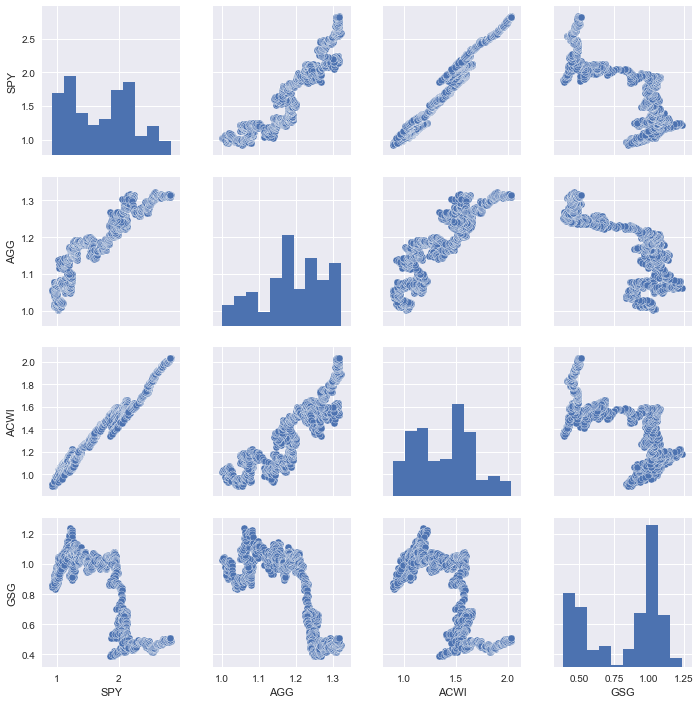

In [9]:
pairplot_tks = ['SPY', 'AGG', 'ACWI', 'GSG']

sns.set(style='darkgrid')
df_sns = np.cumprod(1 + df_class.loc[:, tuple(pairplot_tks)])

sns.pairplot(df_sns)

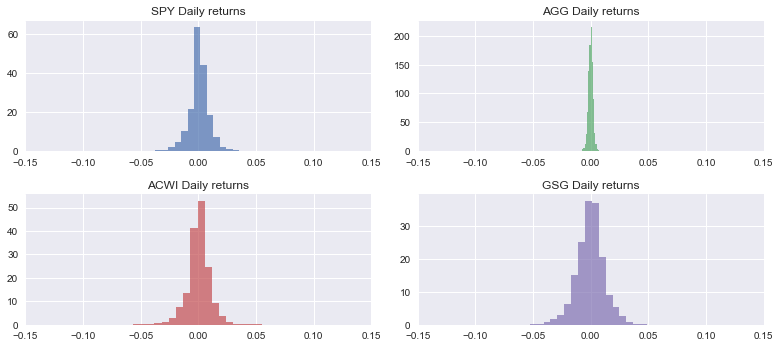

In [10]:
figsize(11., 5 )

colors = sns.color_palette()

for i, _class in enumerate(pairplot_tks):
    plt.subplot(2,2,i+1)
    plt.hist(df_class[_class], bins=20,
             normed = True, histtype="stepfilled",
             color=colors[i], alpha=0.7)
    plt.title(_class + " Daily returns")
    plt.xlim(-0.15, 0.15)

plt.tight_layout()


## 2.5 Data tables

-  Multi-Class ETFs Returns

In [11]:
df_class

SPY       AGG      ACWI       GSG
date                                              
2010-01-04  0.016960  0.001163  0.020572  0.027656
2010-01-05  0.002647  0.004549  0.008341  0.010092
2010-01-06  0.000704 -0.000578 -0.000230  0.007266
2010-01-07  0.004221 -0.001157 -0.004826 -0.004809
2010-01-08  0.003328  0.000579  0.006236  0.002114
2010-01-11  0.001397 -0.000772  0.006426 -0.004822
2010-01-12 -0.009326  0.006372 -0.012543 -0.022411
2010-01-13  0.008446 -0.004221  0.008314 -0.000620
2010-01-14  0.002705  0.002601  0.002061 -0.001860
2010-01-15 -0.011224  0.001879 -0.009829 -0.013354
2010-01-19  0.012496 -0.001587  0.011542  0.007554
2010-01-20 -0.010169  0.002594 -0.021680 -0.018432
2010-01-21 -0.019229  0.000287 -0.018894 -0.017187
2010-01-22 -0.022292  0.000575 -0.023062 -0.025907
2010-01-25  0.005128 -0.000096  0.010611  0.008976
2010-01-26 -0.004191  0.001245 -0.005924 -0.010214
2010-01-27  0.004757 -0.000765  0.000000 -0.015313
2010-01-28 -0.011472 -0.000861 -0.016957 -0.001014
2010-01-29 -0.010869  0.002299 -0.013061 -0.010491
2010-02-01  0.015551 -0.001365  0.018477  0.017784
2010-02-02  0.012103  0.001152  0.016180  0.026210
2010-02-03 -0.004983 -0.001822 -0.008444 -0.003602
2010-02-04 -0.030866  0.002401 -0.036253 -0.041078
2010-02-05  0.002067  0.000383 -0.003030 -0.019534
2010-02-08 -0.007219  0.001916 -0.007597  0.007340
2010-02-09  0.012560 -0.001816  0.020413  0.019778
2010-02-10 -0.001959 -0.002299 -0.000250  0.002382
2010-02-11  0.010466 -0.001651  0.009755  0.013578
2010-02-12 -0.000832  0.000211 -0.004706 -0.012056
2010-02-16  0.015735  0.002500  0.020906  0.030847
...              ...       ...       ...       ...
2017-11-16  0.008501 -0.001098  0.010030 -0.003859
2017-11-17 -0.002939  0.001099 -0.001561  0.015494
2017-11-20  0.001706 -0.000549  0.001989 -0.006357
2017-11-21  0.006543  0.001007  0.007657  0.005758
2017-11-22 -0.000885  0.001737  0.001267  0.008906
2017-11-24  0.002310 -0.000183  0.002811  0.004414
2017-11-27 -0.000499  0.000000 -0.003644 -0.003767
2017-11-28  0.010145  0.000000  0.007877 -0.000630
2017-11-29 -0.000609 -0.002465 -0.003768 -0.006305
2017-11-30  0.008755 -0.001647  0.004763 -0.005076
2017-12-01 -0.002075  0.002850 -0.002510  0.012117
2017-12-04 -0.001210 -0.000092 -0.002516 -0.013863
2017-12-05 -0.003597  0.001008 -0.002943  0.000000
2017-12-06  0.000190  0.001007 -0.001968 -0.020447
2017-12-07  0.003153 -0.001280  0.002676  0.004566
2017-12-08  0.005453 -0.000366  0.005758  0.009091
2017-12-11  0.003013 -0.000366  0.003770  0.004504
2017-12-12  0.001765 -0.000458  0.000000 -0.007687
2017-12-13 -0.000112  0.002841  0.002365 -0.005810
2017-12-14 -0.004086  0.000274 -0.005135  0.006494
2017-12-15  0.008286  0.000274  0.004046  0.001935
2017-12-18  0.006341 -0.001279  0.009170  0.002576
2017-12-19 -0.003840 -0.002927 -0.003175  0.003854
2017-12-20 -0.000524 -0.002293 -0.000697  0.007678
2017-12-21  0.002060  0.000886  0.003348  0.003175
2017-12-22 -0.000262  0.000460  0.001112  0.003165
2017-12-26 -0.001196  0.000827 -0.001111  0.017666
2017-12-27  0.000487  0.003120  0.001112  0.002480
2017-12-28  0.002057 -0.000732  0.002222  0.006184
2017-12-29 -0.003771  0.001007 -0.000970  0.000615

[2013 rows x 4 columns]

In [12]:
dates = df_class.index.unique()

# 3. Data Analysis 

## 3.1 Prior random distributions

### 3.1.1 The Gamma distribution

A Gamma random variable, denoted $X \sim \text{Gamma}(\alpha, \beta)$, is a random variable over the positive real numbers. It is in fact a generalization of the Exponential random variable, that is:

$$ \text{Exp}(\beta) \sim \text{Gamma}(1, \beta) $$

This additional parameter allows the probability density function to have more flexibility, hence allowing the practitioner to express his or her subjective priors more accurately. The density function for a $\text{Gamma}(\alpha, \beta)$ random variable is:

$$ f(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} $$

where $\Gamma(\alpha)$ is the [Gamma function](http://en.wikipedia.org/wiki/Gamma_function), and for differing values of $(\alpha, \beta)$ looks like:

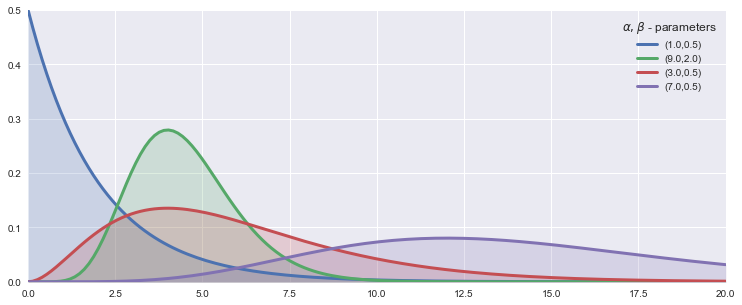

In [13]:
figsize(12.5, 5)
gamma = stats.gamma

parameters = [(1, 0.5), (9, 2), (3, 0.5), (7, 0.5)]
x = np.linspace(0.001 ,20, 150)
for alpha, beta in parameters:
    y = gamma.pdf(x, alpha, scale=1./beta)
    lines = plt.plot(x, y, label = "(%.1f,%.1f)"%(alpha,beta), lw = 3)
    plt.fill_between(x, 0, y, alpha = 0.2, color = lines[0].get_color())
    plt.autoscale(tight=True)
    
plt.legend(title=r"$\alpha, \beta$ - parameters");

### 3.1.2 The Beta distribution

A random variable $X$ has a $\text{Beta}$ distribution, with parameters $(\alpha, \beta)$, if its density function is:

$$f_X(x | \; \alpha, \beta ) = \frac{ x^{(\alpha - 1)}(1-x)^{ (\beta - 1) } }{B(\alpha, \beta) }$$

where $B$ is the [Beta function](http://en.wikipedia.org/wiki/Beta_function) . The random variable $X$ is only allowed in [0,1], making the Beta distribution a popular distribution for decimal values, probabilities and proportions. The values of $\alpha$ and $\beta$, both positive values, provide great flexibility in the shape of the distribution. Below we plot some distributions:

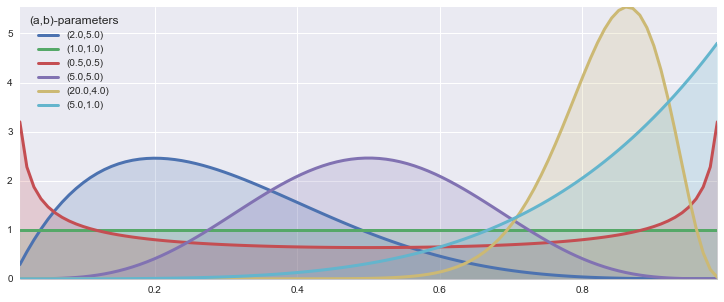

In [14]:
figsize(12.5, 5)

params = [(2, 5), (1, 1), (0.5, 0.5), (5, 5), (20, 4), (5, 1)]

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label = "(%.1f,%.1f)"%(a,b), lw = 3)
    plt.fill_between(x, 0, y, alpha = 0.2, color = lines[0].get_color())
    plt.autoscale(tight=True)
plt.ylim(0)
plt.legend(loc = 'upper left', title="(a,b)-parameters");

One thing to notice is the presence of the flat distribution above, specified by parameters $(1,1)$. This is the Uniform distribution. Hence the Beta distribution is a generalization of the Uniform distribution.

There is an interesting connection between the Beta distribution and the Binomial distribution. Suppose we are interested in some unknown proportion or probability $p$. We assign a $\text{Beta}(\alpha, \beta)$ prior to $p$. We observe some data generated by a Binomial process, say $X \sim \text{Binomial}(N, p)$, with $p$ still unknown. Then our posterior *is again a Beta distribution*, i.e. $p | X \sim \text{Beta}( \alpha + X, \beta + N -X )$. Succinctly, one can relate the two by "a Beta prior with Binomial observations creates a Beta posterior". This is a very useful property, both computationally and heuristically.

## 3.2 Objective, Subjective and Empirical priors

### 3.2.1 Objective Priors
We have seen some already, including the *flat* prior, which is a uniform distribution over the entire possible range of the unknown. Using a flat prior implies that we give each possible value an equal weighting. Choosing this type of prior is invoking what is called "The Principle of Indifference", literally we have no prior reason to favor one value over another. 

Aside from the flat prior, other examples of objective priors are less obvious, but they contain important characteristics that reflect objectivity.  

### 3.2.2 Subjective Priors
On the other hand, if we added more probability mass to certain areas of the prior, and less elsewhere, we are biasing our inference towards the unknowns existing in the former area. This is known as a subjective, or *informative* prior. In the figure below, the subjective prior reflects a belief that the unknown likely lives around 0.5, and not around the extremes.

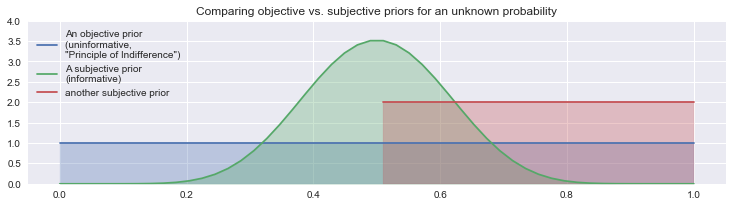

In [15]:
figsize(12.5,3)

x = np.linspace(0,1)
y1, y2 = stats.beta.pdf(x, 1,1), stats.beta.pdf(x, 10,10)

p = plt.plot(x, y1, label='An objective prior \n(uninformative, \n"Principle of Indifference")')
plt.fill_between(x, 0, y1, color = p[0].get_color(), alpha = 0.3)

p = plt.plot(x, y2, label = "A subjective prior \n(informative)")
plt.fill_between(x, 0, y2, color = p[0].get_color(), alpha = 0.3)

p = plt.plot(x[25:], 2*np.ones(25), label = "another subjective prior")
plt.fill_between(x[25:], 0, 2, color = p[0].get_color(), alpha = 0.3)

plt.ylim(0,4)

plt.ylim(0, 4)
leg = plt.legend(loc = "upper left")
leg.get_frame().set_alpha(0.4)
plt.title("Comparing objective vs. subjective priors for an unknown probability");

#### The importance of informative priors

Allowing domain knowledge is useful for many reasons:

- Aids speeds of MCMC convergence. For example, if we know the unknown parameter is strictly positive, then we can restrict our attention there, hence saving time that would otherwise be spent exploring negative values.
- More accurate inference. By weighing prior values near the true unknown value higher, we are narrowing our eventual inference (by making the posterior tighter around the unknown) 
- Express our uncertainty better.

### 3.2.3 Empirical Bayes

While not a true Bayesian method, *empirical Bayes* is a trick that combines frequentist and Bayesian inference. For (almost) every inference problem there is a Bayesian method and a frequentist method. The significant difference between the two is that Bayesian methods have a prior distribution, with hyperparameters $\alpha$, while frequent methods do not have any notion of a prior. Empirical Bayes combines the two methods by using frequentist methods to select $\alpha$, and then proceeds with Bayesian methods on the original problem. 

Suppose we wish to estimate the parameter $\mu$ of a Normal distribution. Since $\mu$ could range over the whole real line, we can use a Normal distribution as a prior for $\mu$. The $\sigma_p^2$ parameter can be chosen to reflect the uncertainty we have.

- Empirical Bayes suggests using the empirical sample mean, which will center the prior around the observed empirical mean:

$$ \mu_p = \frac{1}{N} \sum_{i=0}^N X_i $$

But, Empirical Bayes is *double-counting* the data. That is, we are using the data twice: once in the prior, which will influence our results towards the observed data, and again in the inferential engine of MCMC. This double-counting will understate our true uncertainty. To minimize this double-counting, using Empirical Bayes would be only suggested when it has *lots* of observations, else the prior will have too strong of an influence. It would be also recommended, if possible, to maintain high uncertainty (either by setting a large $\sigma_p^2$ or equivalent.)


## 3.3 Model Mechanism : Bayesian Inference of Multi-Class ETFs Returns and Covariance.


When choosing which stocks to pick, an analyst will often look at the *daily return* of the stock. Suppose $S_t$ is the price of the stock on day $t$, then the daily return on day $t$ is :

$$r_t = \frac{ S_t - S_{t-1} }{ S_{t-1} } $$

The *expected daily return* of a stock is denoted $\mu = E[ r_t ]$. Obviously, stocks with high expected returns are desirable. Unfortunately, stock returns are so filled with noise that it is very hard to estimate this parameter. Furthermore, the parameter might change over time.

For this study, we will be examining the dailly returns of the Multi-class ETFs (SPY, AGG, ACWI, GSG). Suppose we like empirical priors and let's use historical statistics of returns and volatilites to calculate the priors.

### 3.3.1 Multi-class ETFs Prior calculation
 - Empirical priors approach : Using historical annual return and volatility 

In [16]:
def annual_return_volatility (df):
    cum_return        = (1 + df).cumprod()
    annual_ret        = (1 + df).cumprod().resample('A').agg('last').pct_change().fillna(0)
    annual_volatility = df.std() * np.sqrt(252) 
    
    return np.average(annual_ret), annual_volatility

In [17]:
def return_volatility (df):
    
    return np.average(df), df.std()

In [18]:
SPY_list  = []
AGG_list  = []
ACWI_list = []
GSG_list  = []

#SPY_list  = annual_return_volatility(df_class.SPY)
#AGG_list  = annual_return_volatility(df_class.AGG)
#ACWI_list = annual_return_volatility(df_class.ACWI)
#GSG_list  = annual_return_volatility(df_class.GSG)

SPY_list  = return_volatility(df_class.SPY)
AGG_list  = return_volatility(df_class.AGG)
ACWI_list = return_volatility(df_class.ACWI)
GSG_list  = return_volatility(df_class.GSG)

In [19]:
SPY_list

(0.0005572220566318927, 0.009218686384509164)

In [20]:
AGG_list

(0.00013857824143070042, 0.0020825079329306723)

In [21]:
ACWI_list

(0.00040501788375558865, 0.010264601029020477)

In [22]:
GSG_list

(-0.00025844212617983107, 0.012191756943771387)

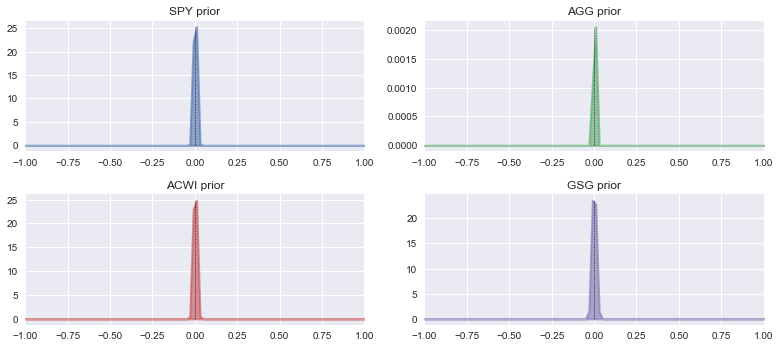

In [23]:
figsize(11., 5)

normal = stats.norm
x = np.linspace(-1, 1, 100)

expert_prior_params = {"SPY"  : (SPY_list[0],  SPY_list[1]),
                       "AGG"  : (AGG_list[0],  AGG_list[1]), 
                       "ACWI" : (ACWI_list[0], ACWI_list[1]), 
                       "GSG"  : (GSG_list[0],  GSG_list[1])   
                 }

for i, (name, params) in enumerate(expert_prior_params.items()):
    plt.subplot(2, 2, i+1)
    y = normal.pdf(x, params[0], scale = params[1])
    plt.fill_between(x, 0, y, linewidth=2, alpha = 0.6, color = colors[i], edgecolor = colors[i])
    plt.title(name + " prior")
    plt.vlines(0, 0, y.max(), "k","--", linewidth = 0.5)
    plt.xlim(-1, 1)
plt.tight_layout()

In order to better model these returns, we should investigate the *covariance matrix* of the returns. 

In [24]:
import pymc3 as pm
import theano.tensor as tt
from theano.tensor.nlinalg import matrix_inverse, diag, matrix_dot

prior_mu  = np.array([x[0] for x in expert_prior_params.values()])
prior_std = np.array([x[1] for x in expert_prior_params.values()])

init = df_class.cov()

with pm.Model() as model:
    cov_matrix = pm.WishartBartlett("covariance", np.diag(prior_std**2), 10, testval = init)

    mu = pm.Normal("returns", mu=prior_mu, sd=1, shape=4)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `n

Here are the returns for our chosen ETFs:

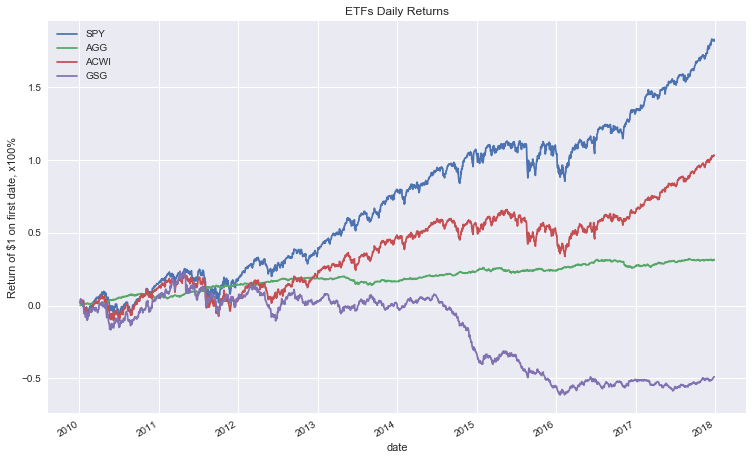

In [25]:
figsize(12.5, 8)

cum_returns = np.cumprod(1 + df_class) - 1
cum_returns.index = dates[::1]
cum_returns.plot()

plt.legend(loc = "upper left")
plt.title("ETFs Daily Returns")
plt.ylabel("Return of $1 on first date, x100%");

Below we perform the inference on the posterior mean return and posterior covariance matrix. 

In [26]:
with model:
    obs = pm.MvNormal("ETFs returns", mu=mu, cov=cov_matrix, observed=df_class)
    step = pm.NUTS()
    trace = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [returns, z, c_log__]


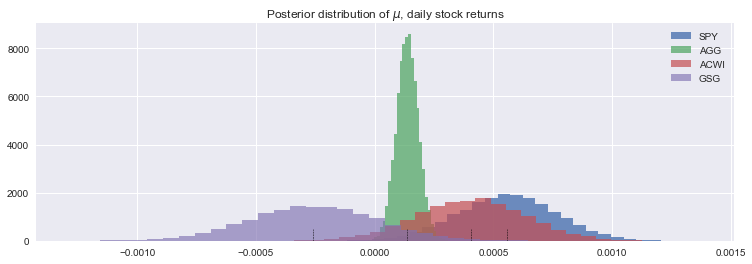

In [27]:
figsize(12.5,4)

#examine the mean return first.
mu_samples = trace["returns"]

for i in range(4):
    plt.hist(mu_samples[:,i], alpha = 0.8 - 0.05*i, bins = 30,
             histtype="stepfilled", normed=True, 
             label = "%s" % df_class.columns[i])

plt.vlines(mu_samples.mean(axis=0), 0, 500, linestyle="--", linewidth = .5)

plt.title("Posterior distribution of $\mu$, daily stock returns")
plt.legend();

Clearly SPY has been a strong performer, and most of the distribution of GSG is negative, suggesting that its *true daily return* is negative.

Below we show the posterior correlation matrix, and posterior standard deviations. We normalize the matrix to acquire the *correlation matrix*. We settle by summarizing the posterior distribution of correlation matrices by showing the *mean posterior correlation matrix*.

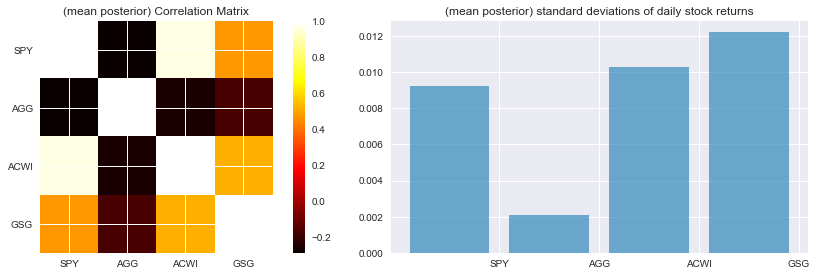

In [28]:
cov_samples = trace["covariance"]
mean_covariance_matrix = cov_samples.mean(axis=0)

def cov2corr(A):
    """
    covariance matrix to correlation matrix.
    """
    d = np.sqrt(A.diagonal())
    A = ((A.T/d).T)/d

    return A


plt.subplot(1,2,1)
plt.imshow(cov2corr(mean_covariance_matrix) , interpolation="none", 
                cmap = "hot") 
plt.xticks(np.arange(4), df_class.columns)
plt.yticks(np.arange(4), df_class.columns)
plt.colorbar(orientation="vertical")
plt.title("(mean posterior) Correlation Matrix")

plt.subplot(1,2,2)
plt.bar(np.arange(4), np.sqrt(np.diag(mean_covariance_matrix)),
        color = "#348ABD", alpha = 0.7)
plt.xticks(np.arange(4) + 0.5, df_class.columns);
plt.title("(mean posterior) standard deviations of daily stock returns")

plt.tight_layout();


Looking at the above figures, we can say that likely AGG has an under-average volatility. The correlation matrix shows that there are strong correlations present, and especially SPY and ACWI express a higher correlation.

## 3.4 Baysian inference  of $ \mu$ and $\sigma$ using MCMC

In [29]:
annual_mu = mu_samples.mean(axis=0) * 252
annual_mu

array([ 0.14026717,  0.03483923,  0.10209042, -0.06547425])

In [30]:
annual_sigma = np.sqrt(np.diag(mean_covariance_matrix)) * np.sqrt(252)
annual_sigma

array([0.14672915, 0.03315379, 0.16335823, 0.19408343])

## 3.5 Mean-Variance Optimization

### 3.5.1 Functions

In [31]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):

    returns = np.sum(mean_returns * weights) * 252
    std     = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

    return std, returns


def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):

    results        = np.zeros((3,num_portfolios))
    weights_record = []

    for i in range(num_portfolios):

        weights  = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev

    return results, weights_record

In [32]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):

    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx  = np.argmax(results[2])
    sdp, rp, sharpe = results[0,max_sharpe_idx], results[1,max_sharpe_idx], results[2,max_sharpe_idx]

    max_sharpe_allocation            = pd.DataFrame(weights[max_sharpe_idx], index=df_class.columns, columns=['weights'])
    max_sharpe_allocation.allocation = [round(i*100, 2) for i in max_sharpe_allocation.weights]
    max_sharpe_allocation            = max_sharpe_allocation.T   

    min_vol_idx                   = np.argmin(results[0])
    sdp_min, rp_min, sharpe_min   = results[0, min_vol_idx], results[1, min_vol_idx], results[2, min_vol_idx]
    min_vol_allocation            = pd.DataFrame(weights[min_vol_idx], index=df_class.columns, columns=['weights'])
    min_vol_allocation.allocation = [round(i*100, 2) for i in min_vol_allocation.weights]
    min_vol_allocation            = min_vol_allocation.T

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:",     round(rp,4))
    print ("Annualised Volatility:", round(sdp,4))
    print ("Sharpe Ratio:",          round(sharpe,2))    
   
    print (max_sharpe_allocation)
    print ("-"*80)
    
    print ('\n')
    
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:",     round(rp_min,4))
    print ("Annualised Volatility:", round(sdp_min,4))
    print ("Sharpe Ratio:",          round(sharpe_min,2))    
    
    print (min_vol_allocation)
    print ("-"*80)
    
    print ('\n')
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

## 3.6 Results

In [33]:
# Random Portfolio Setting

num_portfolios = 20000
risk_free_rate = 0.0126   # source : the mean of RF from Kenneth R. French’s website (http://mba.tuck.dartmouth.edu/, Jan.2010 ~ Dec.2017)

### 3.6.1 Cross Sectional Comparison

#### 3.6.1.1 Optimization of Bayes Sampling $ \mu$ and $\sigma$

C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.0515
Annualised Volatility: 0.0316
Sharpe Ratio: 1.23
              SPY       AGG      ACWI       GSG
weights  0.163494  0.822226  0.004888  0.009392
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0441
Annualised Volatility: 0.0295
Sharpe Ratio: 1.07
              SPY       AGG      ACWI       GSG
weights  0.066977  0.890037  0.038713  0.004273
--------------------------------------------------------------------------------




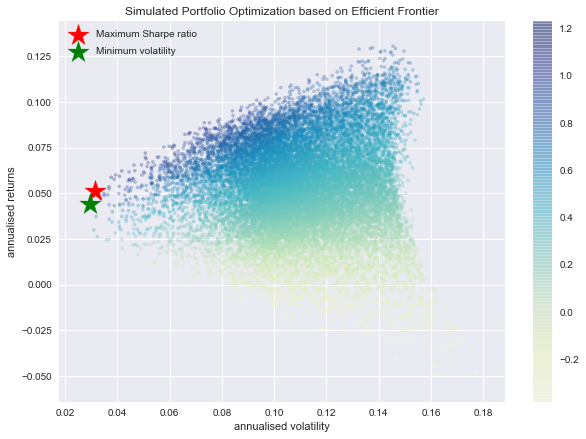

In [34]:
display_simulated_ef_with_random(mu_samples.mean(0), mean_covariance_matrix, num_portfolios, risk_free_rate)

#### 3.6.1.2 Optimization of Historical $ \mu$ and $\sigma$

C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.0587
Annualised Volatility: 0.0393
Sharpe Ratio: 1.17
              SPY       AGG      ACWI       GSG
weights  0.219189  0.733444  0.032508  0.014858
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0411
Annualised Volatility: 0.0293
Sharpe Ratio: 0.97
              SPY       AGG     ACWI       GSG
weights  0.085274  0.874353  0.00737  0.033004
--------------------------------------------------------------------------------




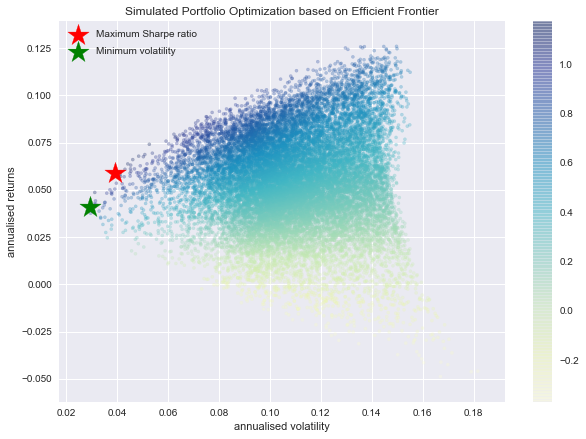

In [35]:
display_simulated_ef_with_random(np.array(df_class.mean()), np.array(df_class.cov()), num_portfolios, risk_free_rate)

### 3.6.2 Times Series Comparison

#### 3.6.2.2 Optimization of Historical $ \mu$ and $\sigma$

--------------------------------------------------------------------------------
Period
2010-01-04  to  2010-03-31


C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.0995
Annualised Volatility: 0.0365
Sharpe Ratio: 2.38
              SPY       AGG      ACWI       GSG
weights  0.218119  0.762193  0.001054  0.018635
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0766
Annualised Volatility: 0.0298
Sharpe Ratio: 2.15
              SPY       AGG      ACWI       GSG
weights  0.080254  0.865355  0.020943  0.033448
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Period
2010-03-31  to  2010-06-30
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annuali

--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.047
Annualised Volatility: 0.022
Sharpe Ratio: 1.57
             SPY       AGG      ACWI      GSG
weights  0.11101  0.866611  0.005909  0.01647
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Period
2012-06-30  to  2012-09-30
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.1118
Annualised Volatility: 0.0243
Sharpe Ratio: 4.09
              SPY       AGG      ACWI       GSG
weights  0.129895  0.797639  0.025347  0.047119
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Retu

--------------------------------------------------------------------------------
Period
2014-09-30  to  2014-12-31
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.0927
Annualised Volatility: 0.0405
Sharpe Ratio: 1.98
              SPY       AGG     ACWI       GSG
weights  0.287045  0.696675  0.00893  0.007351
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0633
Annualised Volatility: 0.0278
Sharpe Ratio: 1.83
              SPY       AGG      ACWI       GSG
weights  0.061152  0.906874  0.022723  0.009251
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Period
2014-12-31  to  2015-03-31
------------------

C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


--------------------------------------------------------------------------------
Period
2015-03-31  to  2015-06-30
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.2464
Annualised Volatility: 0.1796
Sharpe Ratio: 1.3
              SPY       AGG      ACWI       GSG
weights  0.031553  0.065838  0.017294  0.885315
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -0.0479
Annualised Volatility: 0.0343
Sharpe Ratio: -1.76
              SPY       AGG      ACWI       GSG
weights  0.158686  0.800636  0.012844  0.027835
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Period
2015-06-30  to  2015-09-30
---------------

weights  0.001688  0.431496  0.430127  0.13669
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0647
Annualised Volatility: 0.021
Sharpe Ratio: 2.48
              SPY       AGG      ACWI       GSG
weights  0.072727  0.794895  0.087105  0.045273
--------------------------------------------------------------------------------




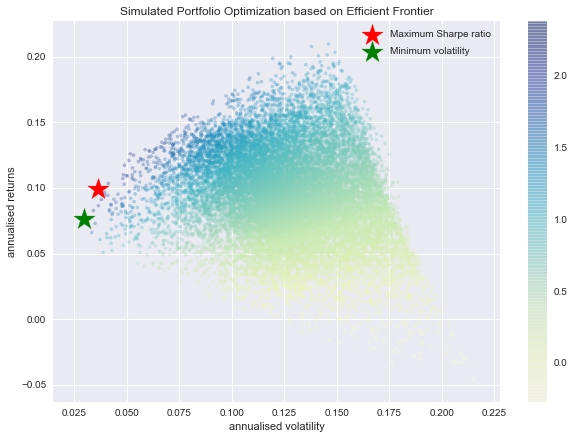

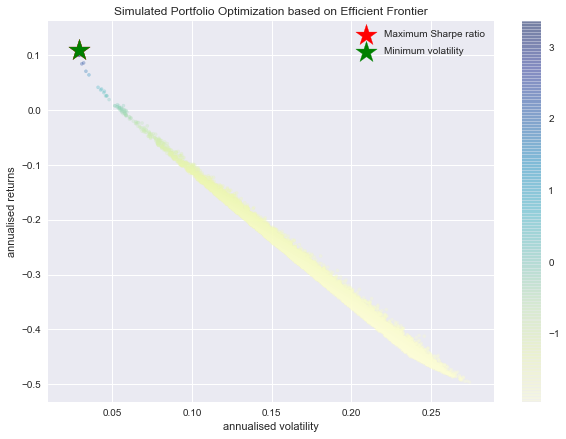

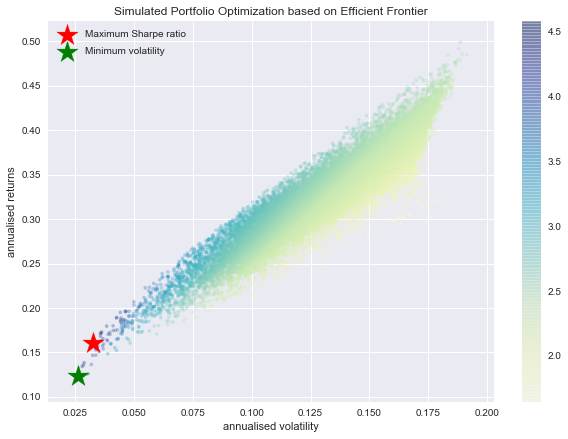

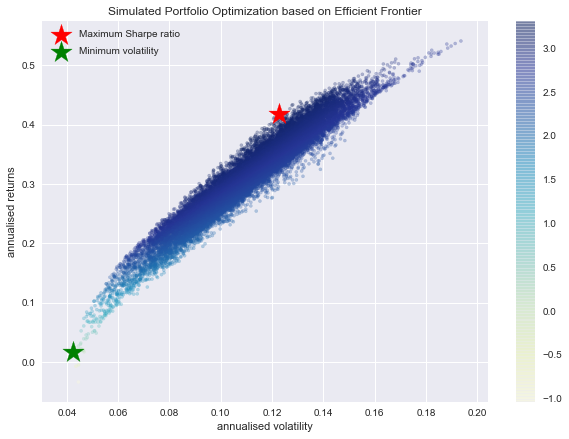

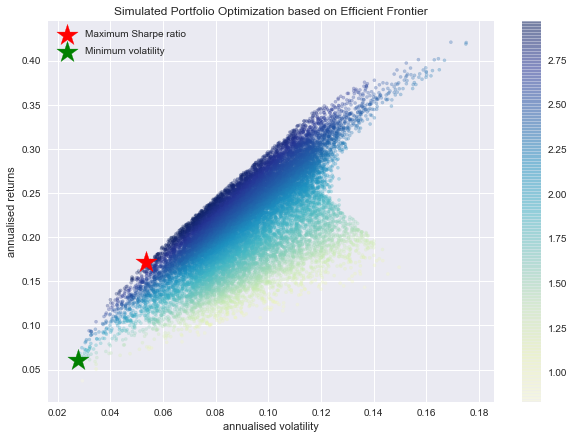

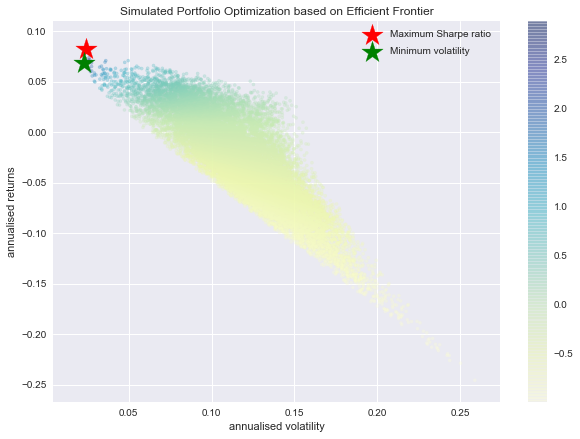

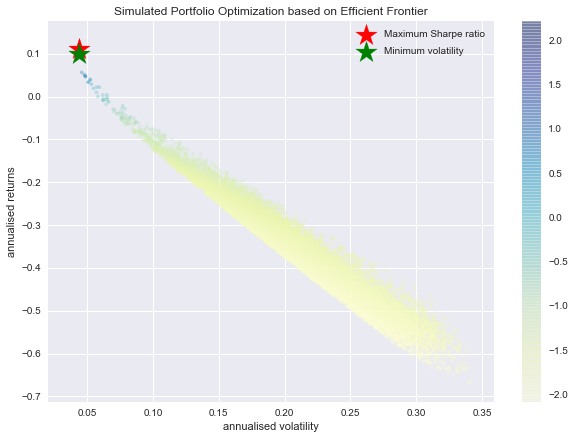

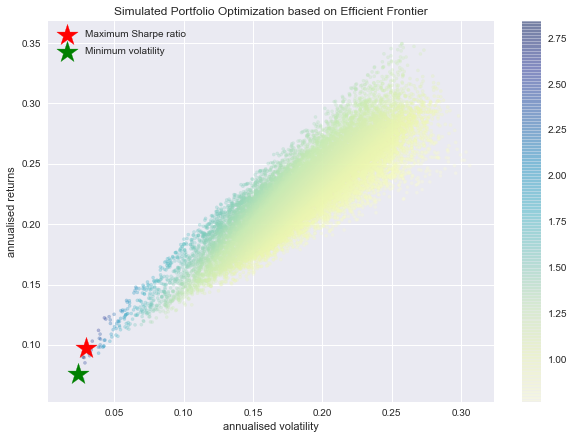

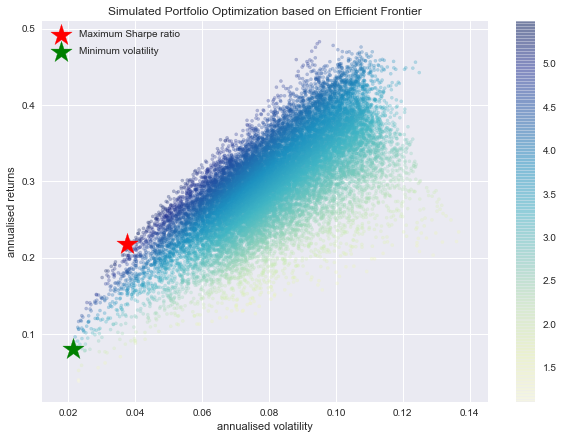

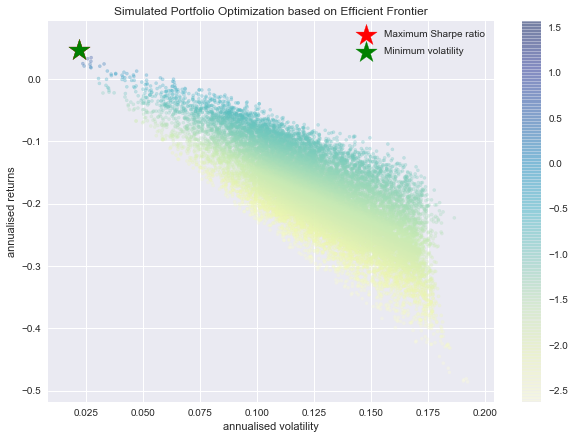

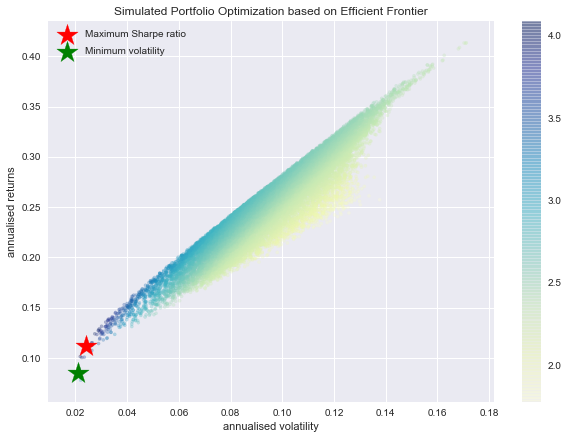

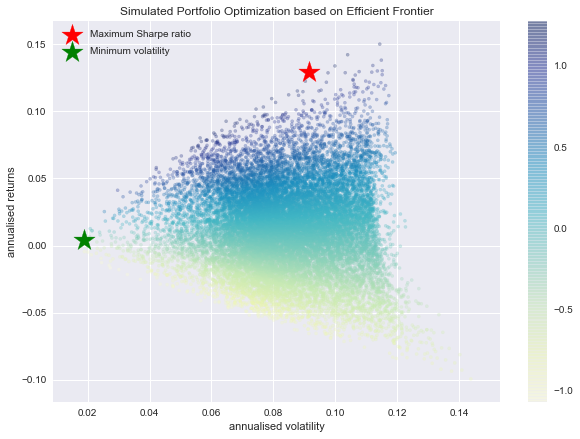

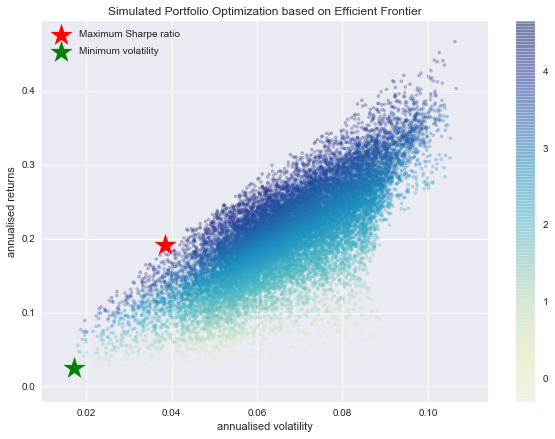

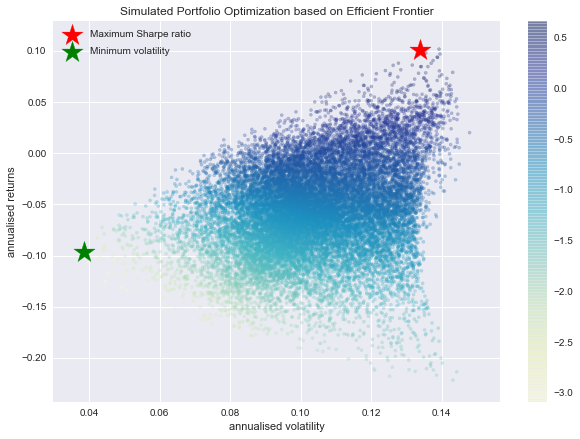

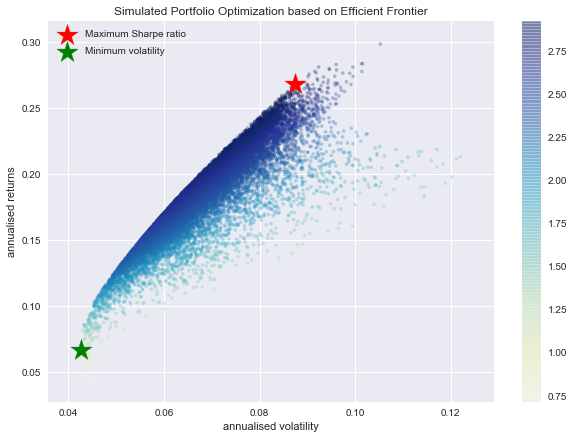

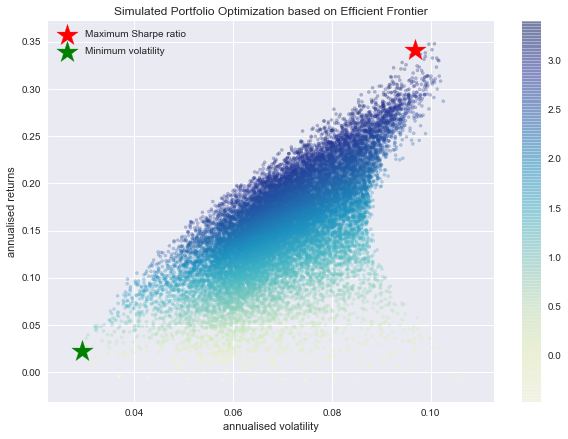

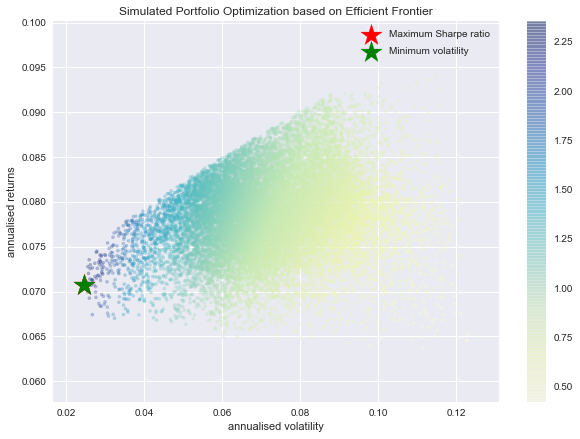

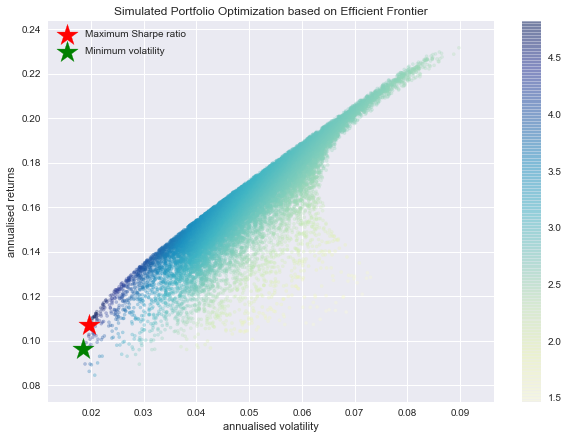

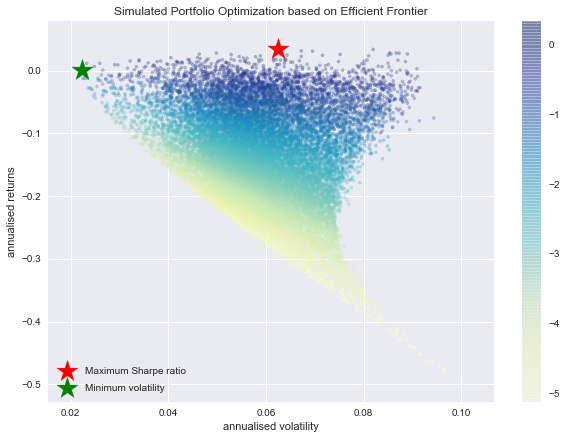

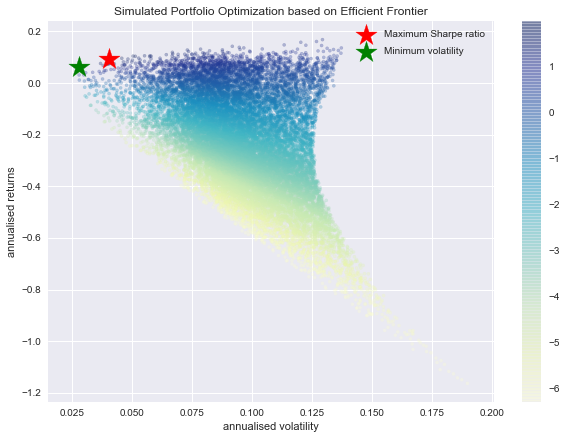

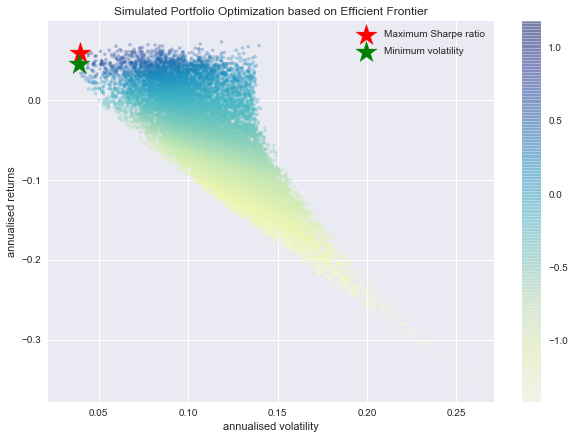

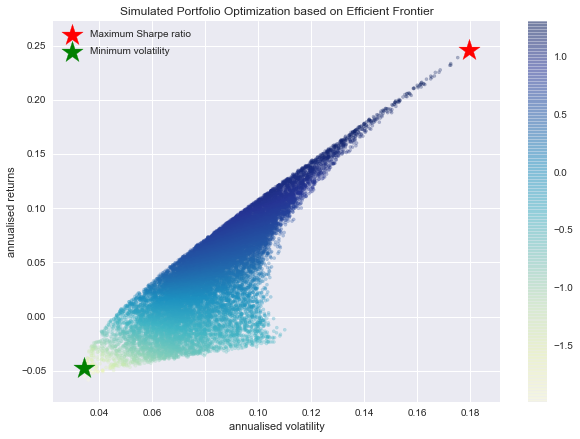

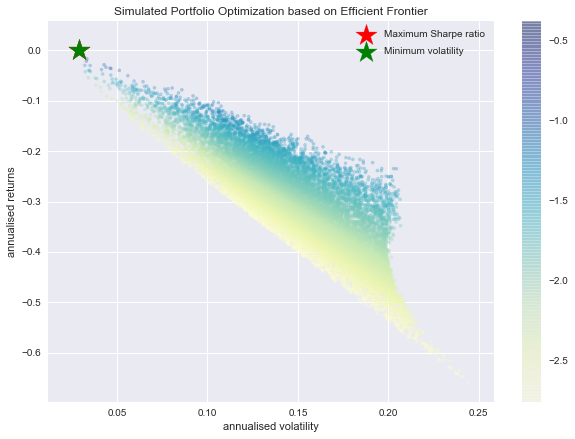

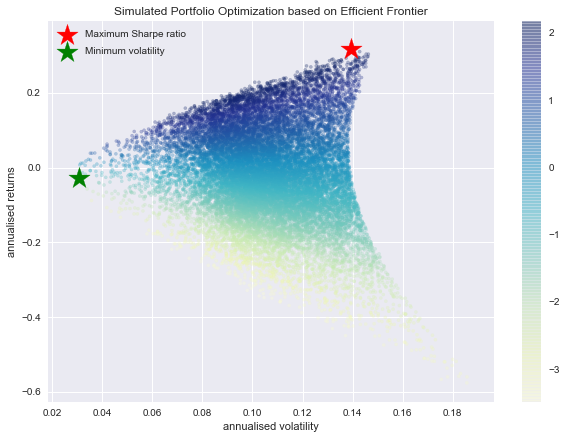

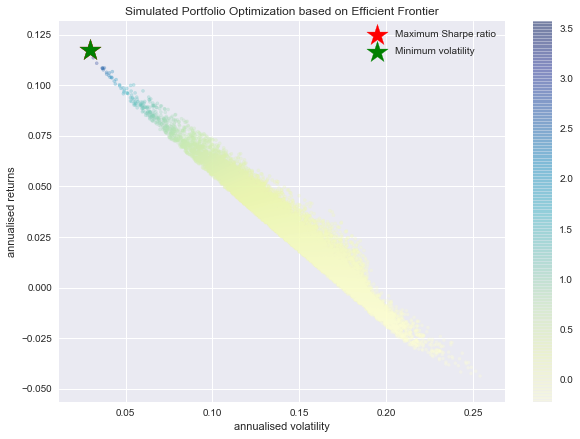

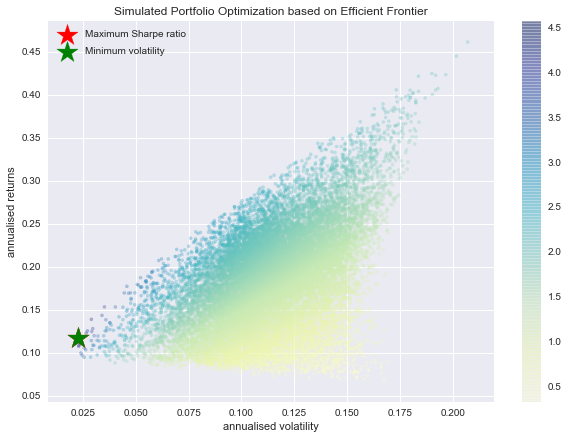

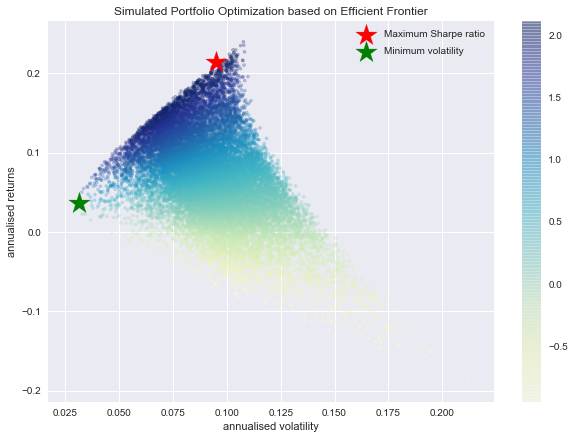

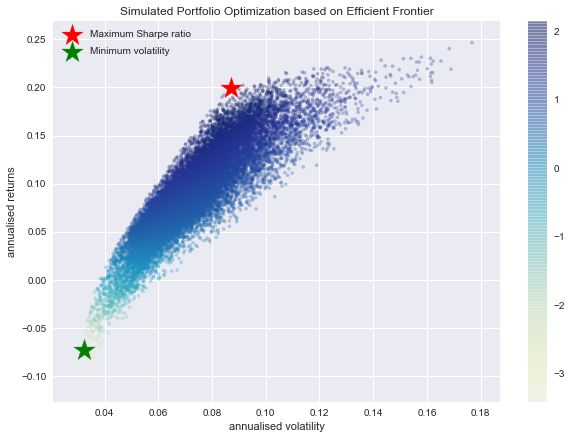

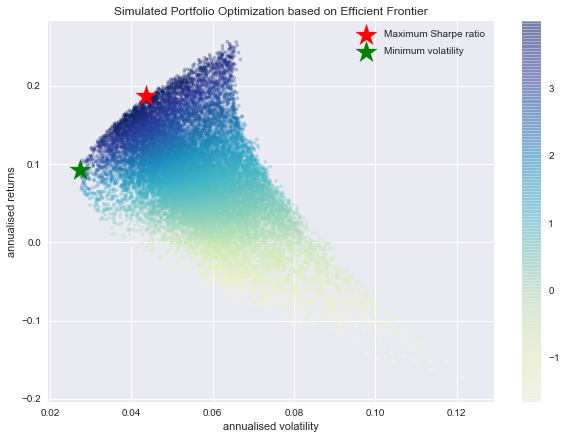

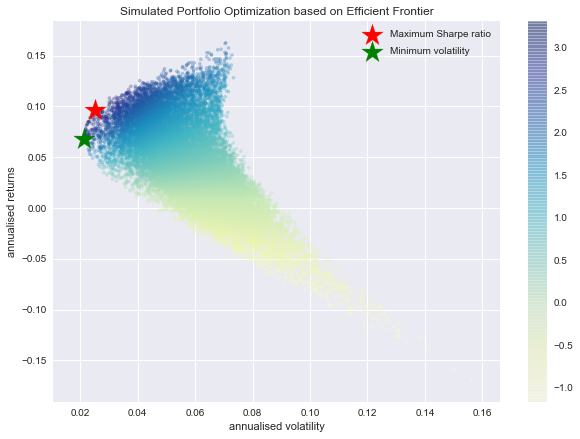

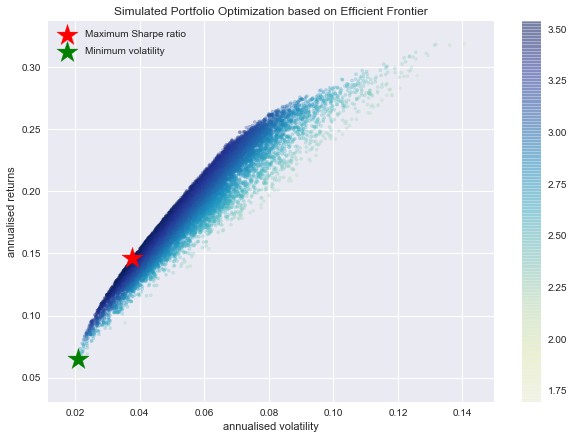

In [36]:
prev = '2010-01-04'
for i in pd.date_range(start = '2010-01-04', end= '2017-12-29', freq = 'Q'):
    current = str(i)[:10]
    Qt_data = df_class.loc[prev:current]
    
    print("-"*80)
    print('Period')
    print(prev, ' to ', current)
    display_simulated_ef_with_random(np.array(Qt_data.mean()), np.array(Qt_data.cov()), 20000, 0.0126)
    prev = str(i)[:10]

# 4. Policy / Strategy implications and conclusions

# Appendix.

## A. The Wishart distribution

The Wishart distribution is a distribution over all [positive semi-definite matrices](http://en.wikipedia.org/wiki/Positive-definite_matrix). Why is this useful to have in our arsenal? (Proper) covariance matrices are positive-definite, hence the Wishart is an appropriate prior for covariance matrices.The following plots are some realizations from the $5 \times 5$ (above) and $20 \times 20$ (below) Wishart distribution:

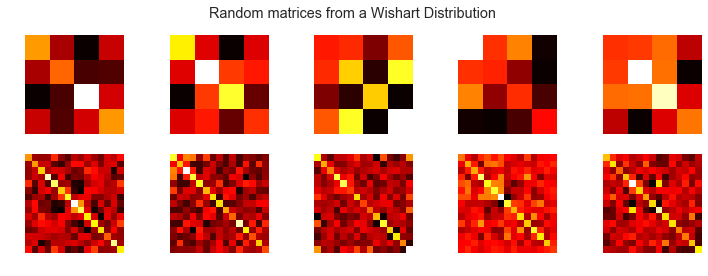

In [37]:
n = 4
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    if i >= 5:
        n = 15
    plt.imshow(stats.wishart.rvs(n+1, np.eye(n)), interpolation="none", 
                cmap = "hot")
    ax.axis("off")
    
plt.suptitle("Random matrices from a Wishart Distribution");

## B. Conjugate Priors

A $\text{Beta}$ prior with $\text{Binomial}$ data implies a $\text{Beta}$ posterior. Graphically:

$$ \underbrace{\text{Beta}}_{\text{prior}} \cdot \overbrace{\text{Binomial}}^{\text{data}} = \overbrace{\text{Beta}}^{\text{posterior} } $$ 

Notice the $\text{Beta}$ on both sides of this equation. It allows us to avoid using MCMC, since the posterior is known in closed form. Hence inference and analytics are easy to derive. 

Suppose $X$ comes from, or is believed to come from, a well-known distribution, call it $f_{\alpha}$, where $\alpha$ are possibly unknown parameters of $f$. $f$ could be a Normal distribution, or Binomial distribution, etc. For particular distributions $f_{\alpha}$, there may exist a prior distribution $p_{\beta}$, such that:

$$ \overbrace{p_{\beta}}^{\text{prior}} \cdot \overbrace{f_{\alpha}(X)}^{\text{data}} = \overbrace{p_{\beta'}}^{\text{posterior} } $$ 

where $\beta'$ is a different set of parameters *but $p$ is the same distribution as the prior*. A prior $p$ that satisfies this relationship is called a *conjugate prior*.

There are a few issues with conjugate priors.

1. The conjugate prior is not objective. Hence only useful when a subjective prior is required. It is not guaranteed that the conjugate prior can accommodate the practitioner's subjective opinion.

2. There typically exist conjugate priors for simple, one dimensional problems. For larger problems, involving more complicated structures, hope is lost to find a conjugate prior. For smaller models, Wikipedia has a nice [table of conjugate priors](http://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions).


## C. Effect of the prior as $N$ increases

In this study, we proposed that as the amount of our observations or data increases, the influence of the prior decreases. This is intuitive. After all, our prior is based on previous information, and eventually enough new information will shadow our previous information's value. The smothering of the prior by enough data is also helpful: if our prior is significantly wrong, then the self-correcting nature of the data will present to us a *less wrong*, and eventually *correct*, posterior. 

We can see this mathematically. The following is a sample from [What is the relationship between sample size and the influence of prior on posterior?](http://stats.stackexchange.com/questions/30387/what-is-the-relationship-between-sample-size-and-the-influence-of-prior-on-poste) on CrossValidated.

>The posterior distribution for a parameter $\theta$, given a data set ${\textbf X}$ can be written as 

$$p(\theta | {\textbf X}) \propto \underbrace{p({\textbf X} | \theta)}_{{\textrm likelihood}}  \cdot  \overbrace{ p(\theta) }^{ {\textrm prior} }  $$



>or, as is more commonly displayed on the log scale, 

$$ \log( p(\theta | {\textbf X})  ) = c + L(\theta;{\textbf X}) + \log(p(\theta)) $$

>The log-likelihood, $L(\theta;{\textbf X}) = \log \left( p({\textbf X}|\theta) \right)$, **scales with the sample size**, since it is a function of the data, while the prior density does not. Therefore, as the sample size increases, the absolute value of $L(\theta;{\textbf X})$ is getting larger while $\log(p(\theta))$ stays fixed (for a fixed value of $\theta$), thus the sum $L(\theta;{\textbf X}) + \log(p(\theta))$ becomes more heavily influenced by $L(\theta;{\textbf X})$ as the sample size increases. 

As the sample size increases, the chosen prior has less influence. Hence inference converges regardless of chosen prior, so long as the areas of non-zero probabilities are the same. 

Below we visualize this. We examine the convergence of two posteriors of a Binomial's parameter $\theta$, one with a flat prior and the other with a biased prior towards 0. As the sample size increases, the posteriors, and hence the inference, converge.

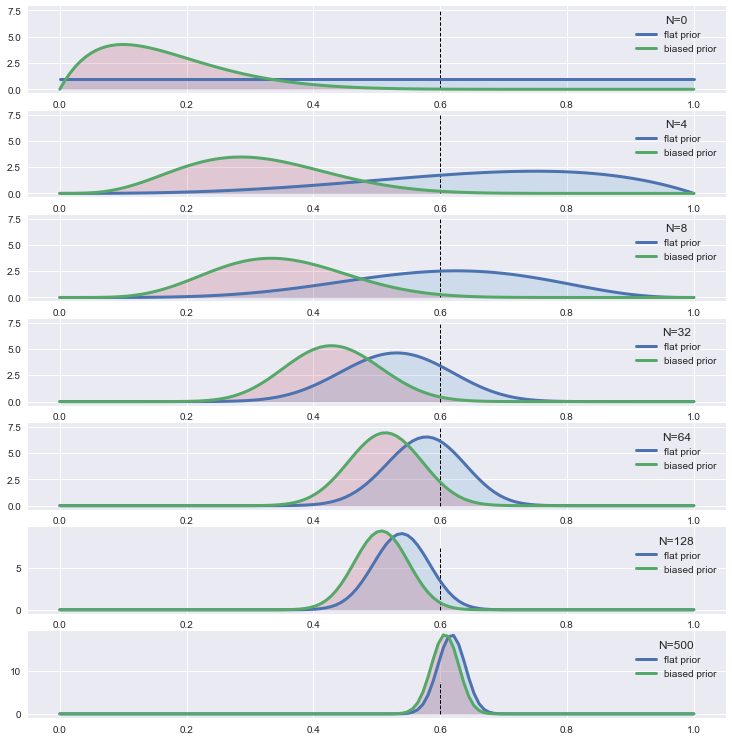

In [38]:
figsize(12.5, 15)

p = 0.6
beta1_params = np.array([1.,1.])
beta2_params = np.array([2,10])
beta = stats.beta

x = np.linspace(0.00, 1, 125)
data = stats.bernoulli.rvs(p, size=500)

plt.figure()
for i,N in enumerate([0,4,8, 32,64, 128, 500]):
    s = data[:N].sum() 
    plt.subplot(8,1,i+1)
    params1 = beta1_params + np.array([s, N-s])
    params2 = beta2_params + np.array([s, N-s])
    y1,y2 = beta.pdf(x, *params1), beta.pdf( x, *params2)
    plt.plot(x,y1, label = r"flat prior", lw =3)
    plt.plot(x, y2, label = "biased prior", lw= 3)
    plt.fill_between(x, 0, y1, color ="#348ABD", alpha = 0.15) 
    plt.fill_between(x, 0, y2, color ="#A60628", alpha = 0.15) 
    plt.legend(title = "N=%d" % N)
    plt.vlines(p, 0.0, 7.5, linestyles = "--", linewidth=1)
    #plt.ylim( 0, 10)#


This example was just to show that eventually the prior is forgotten. The "forgetfulness" of the prior as we become awash in more and more data is the reason why Bayesian and Frequentist inference eventually converge as well.

# References

1. "Modern Portfolio Theory", Wikipedia, https://en.wikipedia.org/wiki/Modern_portfolio_theory  
1. "Efficient Frontier Portfolio Optimisation in Python", Towards Data Science, https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f
2. Cameron Davidson Pilon, "Probabilistic Programming
and Bayesian Methods for Hackers", http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/tree/master/
2. "What is the relationship between sample size and the influence of prior on posterior?", Cross Validated, https://stats.stackexchange.com/questions/30387/what-is-the-relationship-between-sample-size-and-the-influence-of-prior-on-poste
3. "Conjugate prior", Wikipedia, the free encyclopedia, https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions
4. Justin Lent, "Bayesian Optimization of a Technical Trading Algorithm with Zipline+SigOpt", Data Science, https://blog.quantopian.com/bayesian-optimization-of-a-technical-trading-algorithm-with-ziplinesigopt-2/
5. Kenneth R. French, "Fama/French 3 Research Factors", http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/index.html
6. Multi-Class ETFs Data, WRDS, https://wrds-web.wharton.upenn.edu/wrds/
7. Wes McKinney, "Python for Data Analysis 2nd ed"(2017), O'Reilley
8. Chris Chapman, "R for Marketing Research and Analytics"(2014), Springer